In [1]:
import numpy as np
import scipy.io as sio

work_dir = '/Users/pengzehao/Desktop/UofT/Astrostatistics/Iyer_etal_2020_SFH_data/'
extn = '_sfhs_psds.mat'

simulation_names = ['Eagle', 'Illustris', 'IllustrisTNG', 'Mufasa', 'Simba', 'SC-Sam', 'UniverseMachine', 'Fire-2', 'g14', 'Marvel_JL']
combined = []
for sim_name in simulation_names:
    sim_data = sio.loadmat(work_dir + sim_name + extn)
    print(sim_data.keys())
    # Interpolating SFHs into 139 timesteps 
    x = np.linspace(0, 14, 139) # creating general array to act as universal timestep array, with 139 timesteps
    sfhs = np.zeros((len(sim_data['smallsfhs'].T), 139)) # creating a np array of all 0s of size (number of galaxies, 139)
    xp = np.linspace(0, 14, len(sim_data['smallsfhs'].T[0])) 
    for i in range(len(sim_data['smallsfhs'].T)):
        sfhs[i] = np.interp(x, xp, sim_data['smallsfhs'].T[i])
        
    presentsfr = sfhs[:, -1]  # Accessing the last time step for redshift 0 sfr
    logmass = np.array(sim_data['logmass'].ravel())
    if sim_name in ['Simba', 'Mufasa']:
        combined = combined + [[arr, [m, np.arcsinh(s)], sim_name] for arr, m, s in zip(sfhs, logmass, presentsfr) if m > 10]
    else:
        combined = combined + [[arr, [m, np.arcsinh(s)], sim_name] for arr, m, s in zip(sfhs, logmass, presentsfr) if m > 9]
    # Setting a cut off for mass, categorized by simulation

dict_keys(['__header__', '__version__', '__globals__', 'smallsfhs', 'smalltime', 'logmass', 'logt_smooth', 'logpsd_sfhs'])
dict_keys(['__header__', '__version__', '__globals__', 'smallsfhs', 'smalltime', 'logmass', 'log_mhalo_illustris', 'logt_smooth', 'logpsd_sfhs'])
dict_keys(['__header__', '__version__', '__globals__', 'smallsfhs', 'smalltime', 'logmass', 'log_mhalo_tng', 'logt_smooth', 'logpsd_sfhs'])
dict_keys(['__header__', '__version__', '__globals__', 'smallsfhs', 'smalltime', 'logmass', 'logt_smooth', 'logpsd_sfhs'])
dict_keys(['__header__', '__version__', '__globals__', 'smallsfhs', 'smalltime', 'logmass', 'logt_smooth', 'logpsd_sfhs'])
dict_keys(['__header__', '__version__', '__globals__', 'smallsfhs', 'smalltime', 'logmass', 'logt_smooth', 'logpsd_sfhs'])
dict_keys(['__header__', '__version__', '__globals__', 'smallsfhs', 'smalltime', 'logmass', 'logt_smooth', 'logpsd_sfhs'])
dict_keys(['__header__', '__version__', '__globals__', 'smallsfhs', 'smalltime', 'logmass', 'logt_s

In [4]:
combined[1]

[array([0.        , 0.        , 0.        , 0.        , 0.05109203,
        0.07130639, 0.00631652, 0.06571468, 0.00847931, 0.        ,
        0.07781187, 0.10629591, 0.04890435, 0.0656    , 0.0146944 ,
        0.02895827, 0.05112672, 0.05572256, 0.0847094 , 0.09633388,
        0.09520918, 0.04212591, 0.03222769, 0.0393856 , 0.04993124,
        0.06647411, 0.1456627 , 0.14237084, 0.16401301, 0.1863759 ,
        0.18380555, 0.12855645, 0.06953519, 0.05872679, 0.21114703,
        0.24858179, 0.13357279, 0.19640892, 0.22489638, 0.14007006,
        0.0816366 , 0.07602916, 0.14095655, 0.15764026, 0.08185046,
        0.11409658, 0.14913578, 0.10291658, 0.14607949, 0.19235264,
        0.06465236, 0.13416593, 0.13892253, 0.1187999 , 0.10961219,
        0.16171658, 0.06181714, 0.15425992, 0.17780033, 0.02638141,
        0.07597151, 0.12264402, 0.09691891, 0.09186221, 0.07159448,
        0.02608748, 0.0903709 , 0.15928758, 0.081123  , 0.08611456,
        0.01942804, 0.16959999, 0.0934838 , 0.06

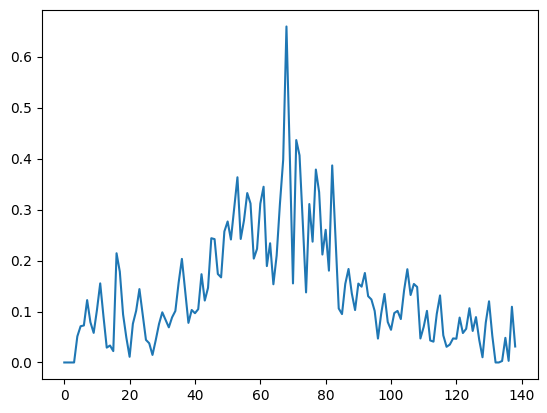

In [3]:
import matplotlib.pyplot as plt
plt.plot(combined[42][0])

In [4]:
import numpy as np
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

# Load your data
SFH_data = np.load('Latent data/SFHdata.npy')
labels_data = np.load('Latent data/labels_vectors.npy')
mass_sfr = np.load('Latent data/masspresentsfr.npy')

# Step 1: Split the data into train, validation, and test sets
SFH_train_val, SFH_test, labels_train_val, labels_test, mass_sfr_train_val, mass_sfr_test = train_test_split(
    SFH_data, labels_data, mass_sfr, test_size=0.2, random_state=42)

SFH_train, SFH_val, labels_train, labels_val, mass_sfr_train, mass_sfr_val = train_test_split(
    SFH_train_val, labels_train_val, mass_sfr_train_val, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2 validation

# Step 2: Convert the data splits to tensors
SFH_train_tensor = torch.tensor(SFH_train, dtype=torch.float32)
SFH_val_tensor = torch.tensor(SFH_val, dtype=torch.float32)
SFH_test_tensor = torch.tensor(SFH_test, dtype=torch.float32)

labels_train_tensor = torch.tensor(labels_train, dtype=torch.float32)
labels_val_tensor = torch.tensor(labels_val, dtype=torch.float32)
labels_test_tensor = torch.tensor(labels_test, dtype=torch.float32)

mass_sfr_train_tensor = torch.tensor(mass_sfr_train, dtype=torch.float32)
mass_sfr_val_tensor = torch.tensor(mass_sfr_val, dtype=torch.float32)
mass_sfr_test_tensor = torch.tensor(mass_sfr_test, dtype=torch.float32)

# Step 3: Create TensorDatasets and DataLoaders
train_dataset = TensorDataset(SFH_train_tensor, labels_train_tensor, mass_sfr_train_tensor)
val_dataset = TensorDataset(SFH_val_tensor, labels_val_tensor, mass_sfr_val_tensor)
test_dataset = TensorDataset(SFH_test_tensor, labels_test_tensor, mass_sfr_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=200, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=200, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=200, shuffle=False)


In [17]:
mass_sfr.T[0]

array([10.915418,  9.049173,  9.091957, ...,  9.595305, 11.440602,
       10.594843], dtype=float32)

In [5]:
device = torch.device("mps")

In [6]:
# Building an MLP model
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

class ConvAutoencoder(nn.Module):
    def __init__(self):
        super(ConvAutoencoder, self).__init__()
        
        # Encoder
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=16, kernel_size=4, padding=1)
        self.conv2 = nn.Conv1d(in_channels=16, out_channels=16, kernel_size=4, padding=1)
        self.conv3 = nn.Conv1d(in_channels=16, out_channels=16, kernel_size=5, padding=1)
        self.conv4 = nn.Conv1d(in_channels=16, out_channels=16, kernel_size=5, padding=1)
        self.pool = nn.MaxPool1d(2, 2)
        self.fc1 = nn.Linear(16 * 7, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 16)  # Latent space
        
        # Decoder (Pathway 1)
        self.fc4 = nn.Linear(16, 32)
        self.fc5 = nn.Linear(32, 64)
        self.fc6 = nn.Linear(64, 16 * 7)
        self.deconv1 = nn.ConvTranspose1d(in_channels=16, out_channels=16, kernel_size=4, stride=2)
        self.deconv2 = nn.ConvTranspose1d(in_channels=16, out_channels=16, kernel_size=4, stride=2)
        self.deconv3 = nn.ConvTranspose1d(in_channels=16, out_channels=16, kernel_size=3, stride=2)
        self.deconv4 = nn.ConvTranspose1d(in_channels=16, out_channels=1, kernel_size=3, stride=2)

        # Pathway 2: MLP for simulation type classification
        self.fc_sim1 = nn.Linear(16, 100)
        self.fc_sim2 = nn.Linear(100, 100)
        self.fc_sim3 = nn.Linear(100, 10)
        
        # Pathway 3: MLP for SM and SFR prediction
        self.fc_sfr1 = nn.Linear(16, 200)
        self.fc_sfr2 = nn.Linear(200, 200)
        self.fc_sfr3 = nn.Linear(200, 200) 
        self.fc_sfr4 = nn.Linear(200, 2)  # Predicting SM and SFR

    def encoder(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.pool(torch.relu(self.conv3(x)))
        x = self.pool(torch.relu(self.conv4(x)))
        x = x.view(-1, 16 * 7)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        encoded = self.fc3(x)
        return encoded

    def decoder(self, x):
        x = torch.relu(self.fc4(x))
        x = torch.relu(self.fc5(x))
        x = torch.relu(self.fc6(x))
        x = x.view(-1, 16, 7)
        x = torch.relu(self.deconv1(x))
        x = torch.relu(self.deconv2(x))
        x = torch.relu(self.deconv3(x))
        x = torch.relu(self.deconv4(x))
        return x

    def sim_type_classifier(self, x):
        x = torch.relu(self.fc_sim1(x))
        x = torch.relu(self.fc_sim2(x))
        sim_type_output = self.fc_sim3(x)
        return sim_type_output

    def sfr_predictor(self, x):
        x = torch.relu(self.fc_sfr1(x))
        x = torch.relu(self.fc_sfr2(x))
        x = torch.relu(self.fc_sfr3(x))
        sfr_output = self.fc_sfr4(x)
        return sfr_output
    
    def forward(self, x):
        latent = self.encoder(x)
        
        # Pathway 1: Reconstruct SFH
        sfh_output = self.decoder(latent)
        
        # Pathway 2: Classify sim type
        sim_type_output = self.sim_type_classifier(latent)
        
        # Pathway 3: Predict SM and SFR
        sfr_output = self.sfr_predictor(latent)
        
        return sfh_output, sim_type_output, sfr_output


def compute_loss(sfh_output, sfh_target, sim_type_output, sim_type_target, mass_sfr_output, mass_sfr_target, w_reg, w_cl):
    mse_loss = nn.MSELoss()
    cross_entropy_loss = nn.CrossEntropyLoss()

    loss_sfh = mse_loss(sfh_output, sfh_target)
    loss_sim_type = cross_entropy_loss(sim_type_output, sim_type_target)
    loss_mass_sfr = mse_loss(mass_sfr_output, mass_sfr_target)

    total_loss = loss_sfh + w_reg * loss_mass_sfr + w_cl * loss_sim_type
    # print(f'Loss: {total_loss:.3f} | SFH Loss: {loss_sfh:.3f} | Sim Type Loss: {loss_sim_type:.3f} | Mass-SFR Loss: {loss_mass_sfr:.3f}')
    return total_loss, loss_sfh, loss_sim_type, loss_mass_sfr

AE = ConvAutoencoder().to(device)
optimizer = optim.Adam(AE.parameters(), lr=0.01)
scheduler = StepLR(optimizer, step_size=100, gamma=0.9)

In [ ]:
num_epochs = 800
losses = [] # To store training losses
losses_sfh = []  # To store SFH losses
losses_sim_type = []  # To store sim type losses
losses_mass_sfr = []  # To store mass-sfr losses
val_losses = []  # To store validation losses


for epoch in range(num_epochs):
    total_loss = 0.0
    for data in train_loader:
        inputs, sim_labels, mass_sfr = data
        optimizer.zero_grad()
        inputs = inputs.to(device)
        sim_labels = sim_labels.to(device)
        mass_sfr = mass_sfr.to(device)
        sfh_output, sim_type_output, mass_sfr_output = AE(inputs.unsqueeze(1))
        sfh_output = sfh_output.squeeze(1)
        loss = compute_loss(sfh_output, inputs, sim_type_output, sim_labels, mass_sfr_output, mass_sfr, 1, 1)
        loss = loss[0]
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()

    total_loss /= len(train_loader)
    losses.append(total_loss)
    
    # Validation phase
    AE.eval()
    val_loss = 0.0
    sfh_loss = 0.0
    sim_type_loss = 0.0
    mass_sfr_loss = 0.0
    with torch.no_grad():
        for data in val_loader:
            inputs, sim_labels, mass_sfr = data
            inputs = inputs.to(device)
            sim_labels = sim_labels.to(device)
            mass_sfr = mass_sfr.to(device)
            sfh_output, sim_type_output, mass_sfr_output = AE(inputs.unsqueeze(1))
            loss, loss_sfh, loss_sim_type, loss_mass_sfr = compute_loss(sfh_output, inputs, sim_type_output, sim_labels, mass_sfr_output, mass_sfr, 1, 1)
            val_loss += loss.item()
            sfh_loss += loss_sfh.item()
            sim_type_loss += loss_sim_type.item()
            mass_sfr_loss += loss_mass_sfr.item()
            
    
    val_loss /= len(val_loader)
    sfh_loss /= len(val_loader)
    sim_type_loss /= len(val_loader)
    mass_sfr_loss /= len(val_loader)
    val_losses.append(val_loss)
    losses_sfh.append(sfh_loss)
    losses_sim_type.append(sim_type_loss)
    losses_mass_sfr.append(mass_sfr_loss)
    
    if epoch % 10 == 0:
        print(f'Epoch [{epoch}/{num_epochs}], Training Loss: {total_loss:.4f}, Val Loss: {val_loss:.4f}, SFH Loss: {sfh_loss:.4f}, Sim Type Loss: {sim_type_loss:.4f}, Mass-SFR Loss: {mass_sfr_loss:.4f}')
    
    scheduler.step()

print('Training complete')

Epoch [0/800], Training Loss: 24.2650, Val Loss: 13.1572, SFH Loss: 11.3344, Sim Type Loss: 1.4576, Mass-SFR Loss: 0.3651
Epoch [10/800], Training Loss: 3.3885, Val Loss: 14.6144, SFH Loss: 13.7640, Sim Type Loss: 0.6033, Mass-SFR Loss: 0.2471
Epoch [20/800], Training Loss: 3.0091, Val Loss: 14.0449, SFH Loss: 13.2881, Sim Type Loss: 0.5039, Mass-SFR Loss: 0.2529
Epoch [30/800], Training Loss: 2.6752, Val Loss: 14.1335, SFH Loss: 13.5680, Sim Type Loss: 0.3945, Mass-SFR Loss: 0.1710
Epoch [40/800], Training Loss: 2.4571, Val Loss: 14.5657, SFH Loss: 14.2330, Sim Type Loss: 0.2038, Mass-SFR Loss: 0.1289
Epoch [50/800], Training Loss: 2.2785, Val Loss: 14.3217, SFH Loss: 14.0118, Sim Type Loss: 0.1848, Mass-SFR Loss: 0.1250
Epoch [60/800], Training Loss: 2.2464, Val Loss: 14.0448, SFH Loss: 13.7070, Sim Type Loss: 0.2048, Mass-SFR Loss: 0.1331
Epoch [70/800], Training Loss: 2.2227, Val Loss: 13.9031, SFH Loss: 13.5502, Sim Type Loss: 0.1851, Mass-SFR Loss: 0.1678
Epoch [80/800], Training

KeyboardInterrupt: 

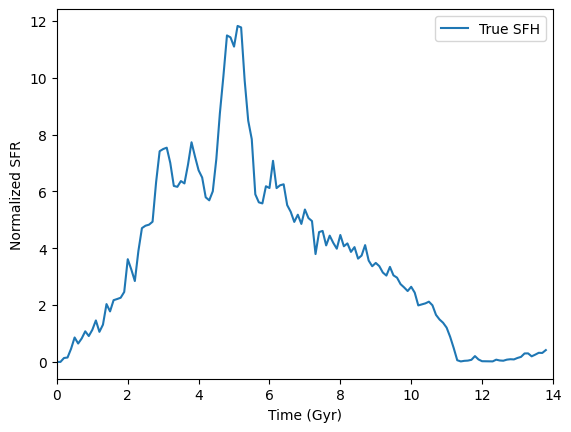

In [49]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

i = 42
AE = torch.load('AE Models/multimodal2.pth')
plt.figure()
SFH_pred_tensor = AE(SFH_test_tensor.unsqueeze(1).to(device))[0].squeeze(1).cpu().detach()
plt.plot(SFH_test_tensor[i], label='True SFH')
plt.legend()

# Define a function to convert from 100 Myr to Gyr
def myr_to_gyr(x, pos):
    'Converts from 100 Myr to Gyr'
    return '%d' % round(x * 0.1)

formatter = FuncFormatter(myr_to_gyr)

# Use the formatter
plt.gca().xaxis.set_major_formatter(formatter)
plt.xlim(0, 140)

plt.xlabel('Time (Gyr)')
plt.ylabel('Normalized SFR')
plt.savefig("ExampleSFH.pdf", format="pdf", bbox_inches="tight")

AttributeError: 'XAxis' object has no attribute 'major_formatter'

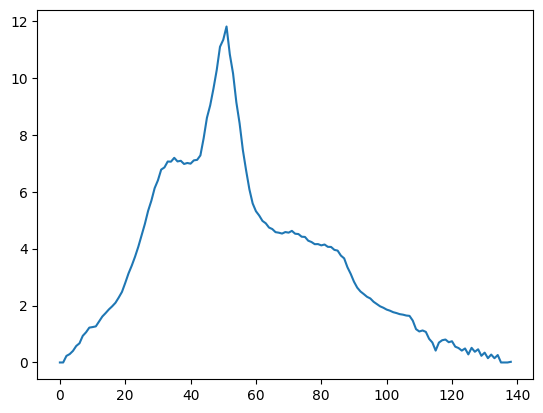

In [38]:

i = 42
plt.plot(SFH_pred_tensor[i])

# Define a function to convert from 100 Myr to Gyr
def myr_to_gyr(x, pos):
    'Converts from 100 Myr to Gyr'
    return '%d' % round(x * 0.1)

formatter = FuncFormatter(myr_to_gyr)

# Use the formatter
plt.gca().xaxis.major_formatter(formatter)
plt.xlim(0,140)

plt.xlabel('Time (Gyr)')
plt.ylabel('Normalized SFR')
plt.title('SFH of an example EAGLE galaxy')

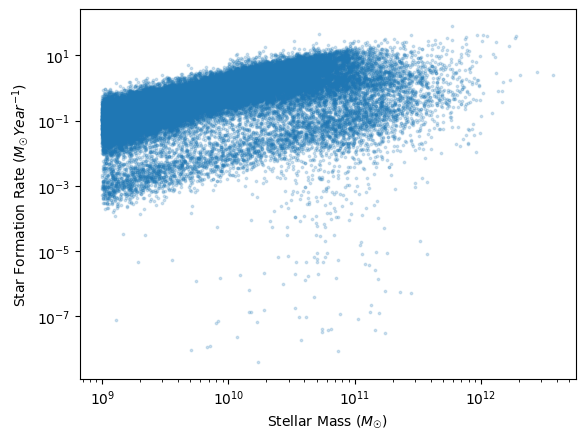

In [51]:
plt.scatter(10**(mass_sfr.T[0]), np.sinh(mass_sfr.T[1]), s=3, alpha=0.2, rasterized=True)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Stellar Mass ($M_\u2609$)')
plt.ylabel('Star Formation Rate ($M_\u2609 Year^{-1}$)')
plt.savefig("MassSFR.pdf", format="pdf", bbox_inches="tight")

In [30]:
with torch.no_grad():
    y_pred_tensor = AE(SFH_test_tensor.unsqueeze(1).to(device))

pred_sfh = y_pred_tensor[0]
pred_sim = y_pred_tensor[1]
pred_mass_sfr = y_pred_tensor[2]
pred_mass_sfr.shape, pred_sfh.shape
stellar_mass = mass_sfr_test_tensor.T[0].to(device)
star_formation_rate = mass_sfr_test_tensor.T[1].to(device)
labels = labels_test_tensor.to(device)

pred_mass = pred_mass_sfr.T[0].to(device)
pred_sfr = pred_mass_sfr.T[1].to(device)

In [31]:
pred_mass_sfr.shape, pred_sfh.shape

(torch.Size([12622, 2]), torch.Size([12622, 1, 139]))

In [39]:
import numpy as np

# Convert arcsinh values back to original values
stellar_mass = mass_sfr_test_tensor.T[0].to(device)
star_formation_rate = np.sinh(mass_sfr_test_tensor.T[1].to(device).cpu().numpy())

pred_mass = pred_mass_sfr.T[0].to(device)
pred_sfr = np.sinh(pred_mass_sfr.T[1].to(device).cpu().numpy())

# Convert to log values
star_formation_rate_log = np.log10(star_formation_rate)
pred_sfr_log = np.log10(pred_sfr)


/var/folders/xp/6swc9ryd7dd18jw236kls_kw0000gn/T/ipykernel_43744/3543367383.py:11: RuntimeWarning: divide by zero encountered in log10
  star_formation_rate_log = np.log10(star_formation_rate)
/var/folders/xp/6swc9ryd7dd18jw236kls_kw0000gn/T/ipykernel_43744/3543367383.py:12: RuntimeWarning: invalid value encountered in log10
  pred_sfr_log = np.log10(pred_sfr)


/var/folders/xp/6swc9ryd7dd18jw236kls_kw0000gn/T/ipykernel_43744/2140877104.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  pred_mass_tensor = torch.tensor(pred_mass)
/var/folders/xp/6swc9ryd7dd18jw236kls_kw0000gn/T/ipykernel_43744/2140877104.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  stellar_mass_tensor = torch.tensor(stellar_mass)


Score for log stellar mass: 0.7952109575271606
Score for arcsinh SFR: 0.5261637568473816

RMSE for Stellar Mass: 0.2847140431404114 
RMSE for SFR: 1.182688593864441

Baseline RMSE for Stellar Mass: 0.6291518807411194 (Predicting the mean) 
Baseline RMSE for SFR: 1.7181310653686523 (Predicting the mean)

1,5,10,50,90,95,99 Percentiles for mass residuals: [-0.83298862 -0.45108676 -0.31372185  0.03472519  0.29779816  0.41549997
  0.80535316]

1,5,10,50,90,95,99 Percentiles for SFR residuals: [-3.99353068 -0.97276053 -0.3220854   0.10671671  0.65065798  1.06069296
  2.3365786 ]


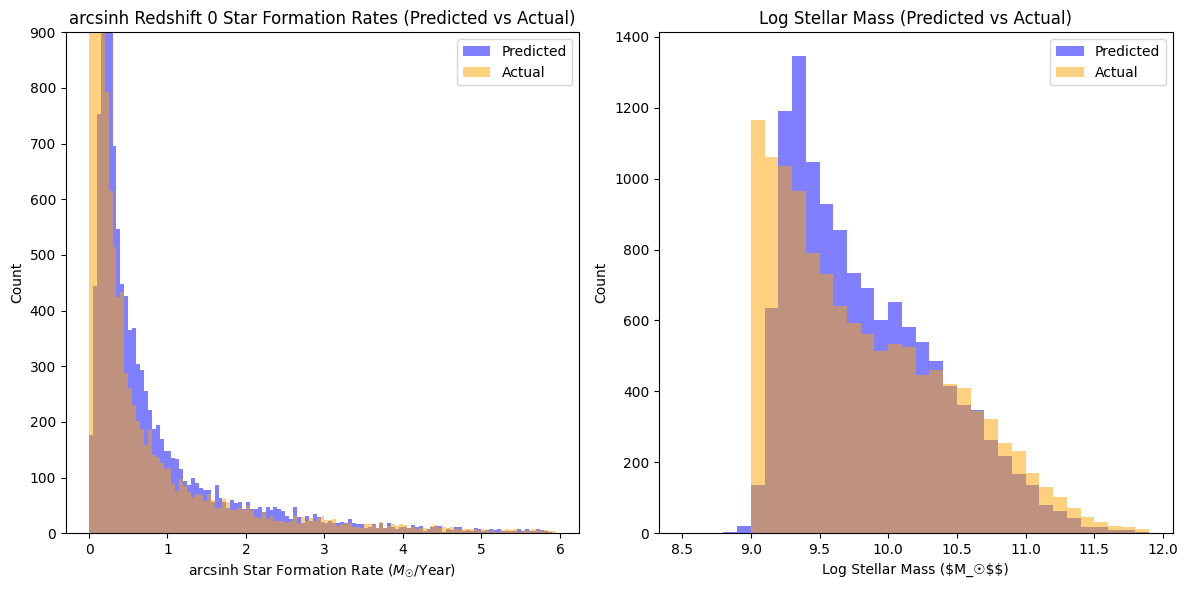

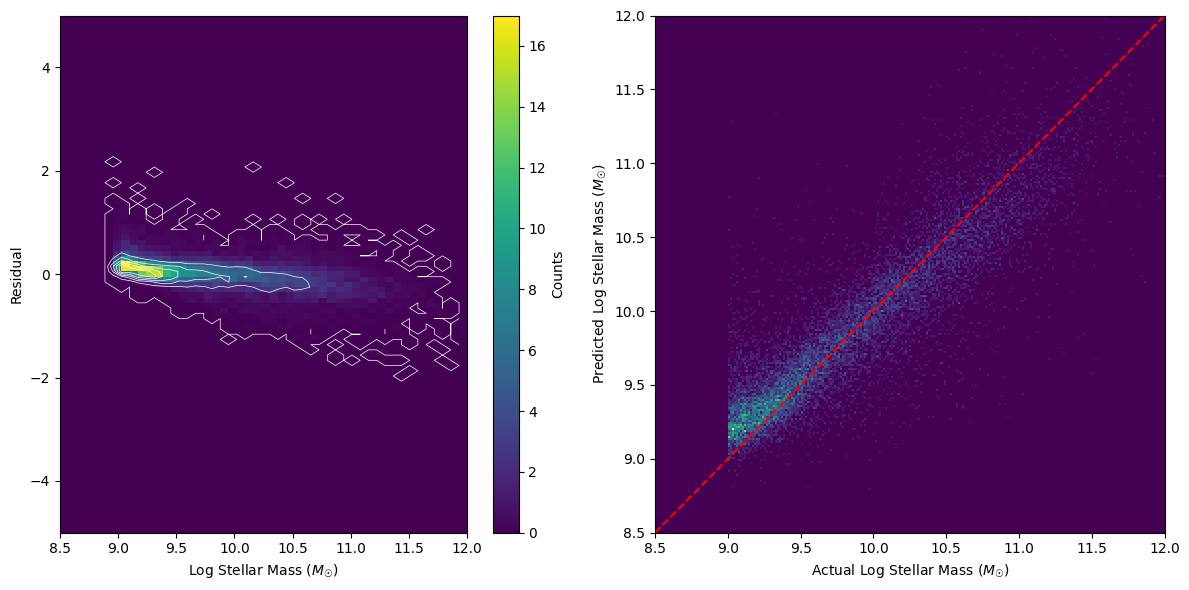

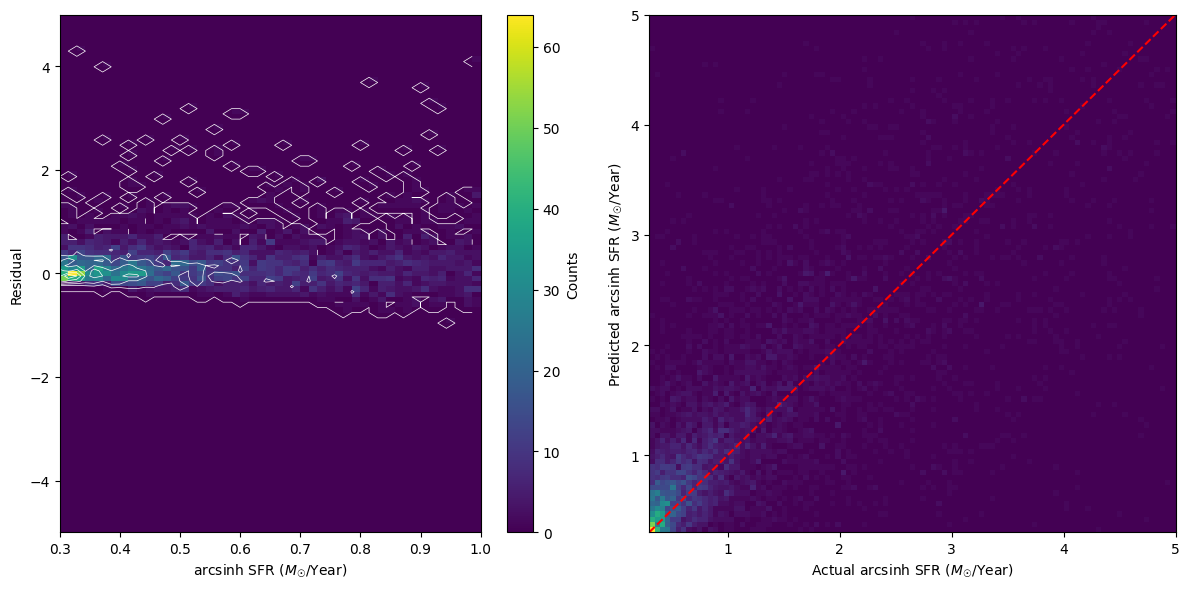

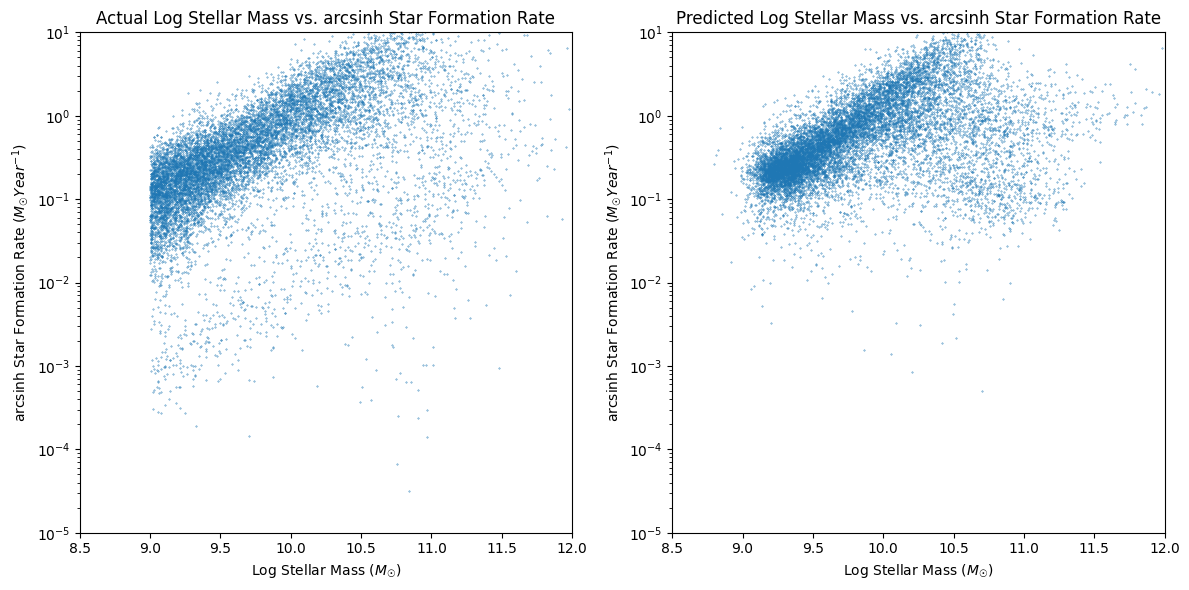

In [43]:
import torch

# Convert numpy arrays to PyTorch tensors
pred_mass_tensor = torch.tensor(pred_mass)
pred_sfr_tensor = torch.tensor(pred_sfr)
stellar_mass_tensor = torch.tensor(stellar_mass)
star_formation_rate_tensor = torch.tensor(star_formation_rate)

# Move tensors to CPU
pred_mass_tensor = pred_mass_tensor.cpu()
pred_sfr_tensor = pred_sfr_tensor.cpu()
stellar_mass_tensor = stellar_mass_tensor.cpu()
star_formation_rate_tensor = star_formation_rate_tensor.cpu()

from DataEval import pred_actual_data_eval, pred_actual_data_vis
pred_actual_data_eval(pred_mass_tensor, pred_sfr_tensor, stellar_mass_tensor, star_formation_rate_tensor)
pred_actual_data_vis(pred_mass_tensor, pred_sfr_tensor, stellar_mass_tensor, star_formation_rate_tensor)
